In [101]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import datasets, linear_model
from functools import reduce

import os
import geopandas as gpd
import re
import string
import unicodedata
from scipy import stats

In [102]:
# read the first dataset from github
df = pd.read_csv('qm_final.csv')

In [103]:
# checking shape of df_1
print("The dataset has {} rows and {} columns.".format(*df.shape))

# checking duplicates
print("It contains {} duplicates.".format(df.duplicated().sum()))

The dataset has 32 rows and 9 columns.
It contains 0 duplicates.


In [104]:
df.head()

,Unnamed: 0,Boroughs,NEET_rate,Percentage_of economically_active_with_NVQ4,Job_density,Benefit_claimants_rate,A_grade_passes_rate,Number_of_state_funded_school,Percentage_of_children_in_Poverty
0,E09000002,Barking and Dagenham,6.9,33.8,0.44,17.2,15.090674,56,35.30%
1,E09000003,Barnet,3.6,53.2,0.61,9.3,33.475618,109,21.20%
2,E09000004,Bexley,4.6,30.5,0.53,9.9,22.771753,73,20.00%
3,E09000005,Brent,5.0,31.0,0.54,12.4,27.075606,74,29.50%
4,E09000006,Bromley,4.3,41.0,0.61,9.0,27.073091,91,17.50%


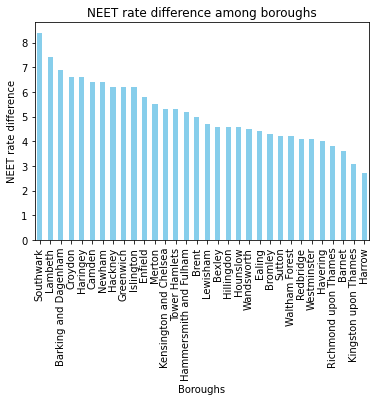

In [105]:
# data summary and description
NEET_rate_gb = df.groupby('Boroughs')['NEET_rate'].mean().sort_values(ascending=False)
NEET_rate_gb.plot(kind='bar',color='skyblue')  
plt.title("NEET rate difference among boroughs")
plt.xlabel("Boroughs")
plt.ylabel("NEET rate difference")
plt.show()

In [106]:
df_outliner = pd.read_csv('qm_outliner.csv')

In [107]:
df_outliner.head()

,Unnamed: 0,Boroughs,NEET_rate,Percentage_of economically_active_with_NVQ4,Job_density,Benefit_claimants_rate,A_grade_passes_rate,Number_of_state_funded_school,Percentage_of_children_in_Poverty
0,E09000002,Barking and Dagenham,6.9,33.8,0.44,17.2,15.090674,56.0,35.30%
1,E09000003,Barnet,3.6,53.2,0.61,9.3,33.475618,109.0,21.20%
2,E09000004,Bexley,4.6,30.5,0.53,9.9,22.771753,73.0,20.00%
3,E09000005,Brent,5.0,31.0,0.54,12.4,27.075606,74.0,29.50%
4,E09000006,Bromley,4.3,41.0,0.61,9.0,27.073091,91.0,17.50%


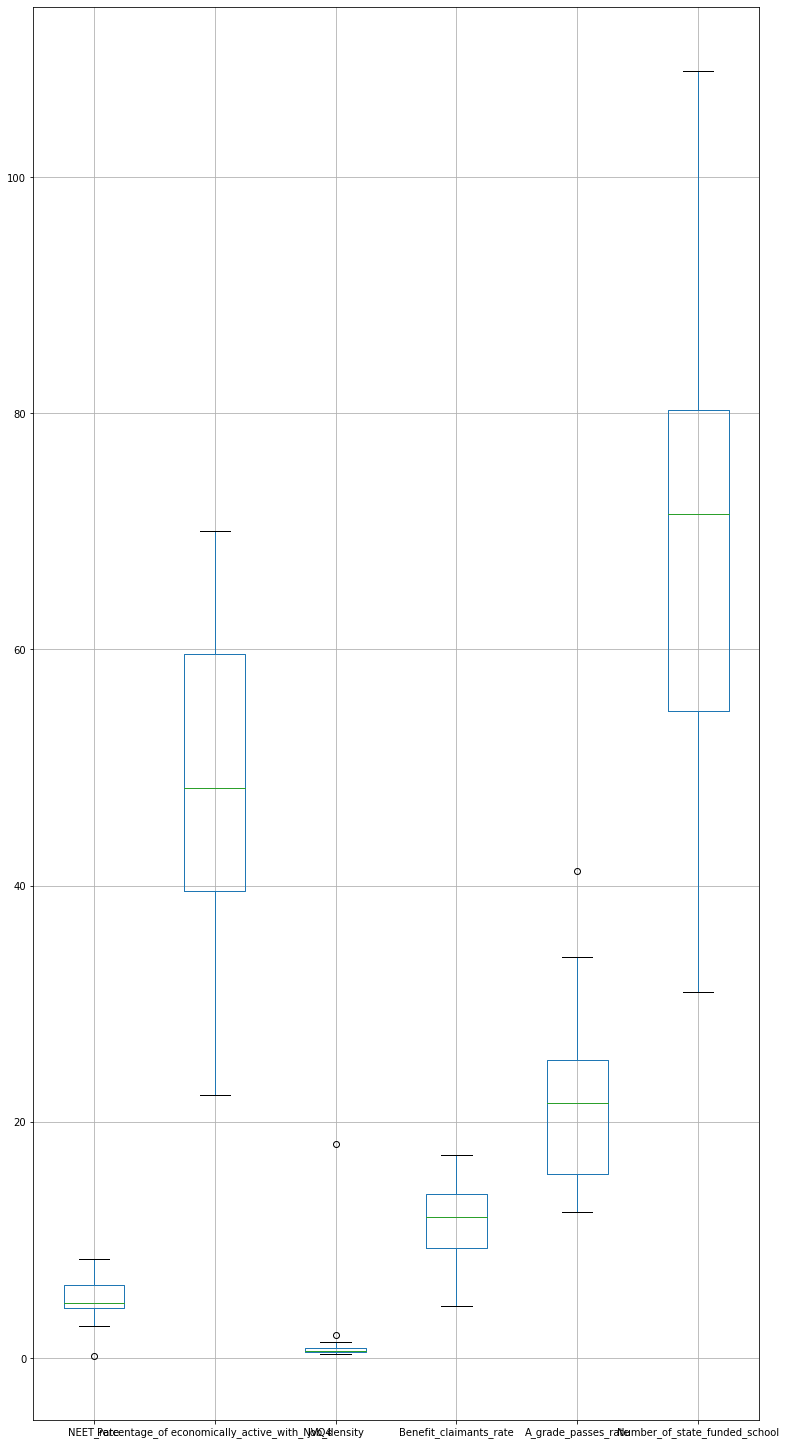

In [108]:
plt.figure(1, figsize=(13, 26))
p = df_outliner.boxplot()

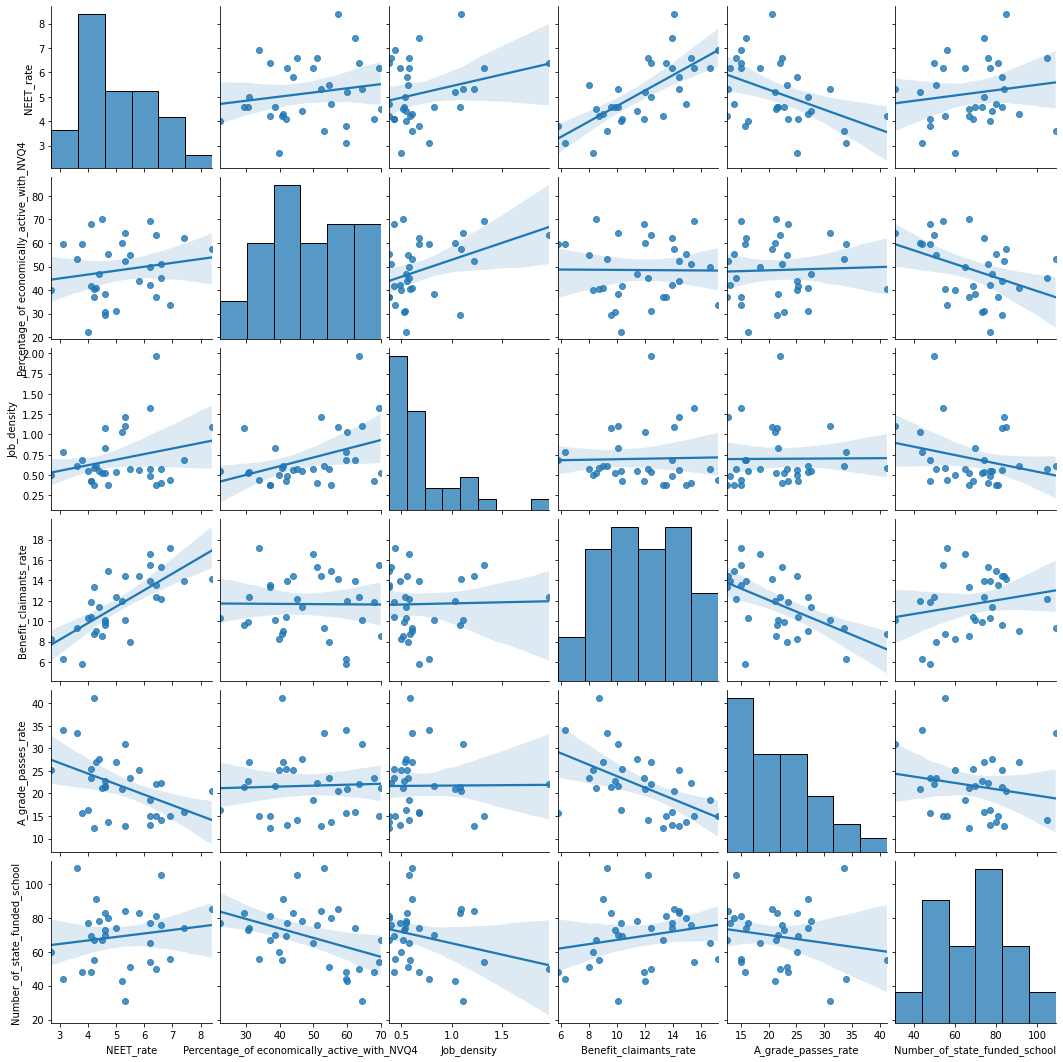

In [119]:
import seaborn as sns

sns.pairplot(df, kind="reg")
sns.set_context('paper',rc={'grid.linewidth':3.0})
plt.show()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

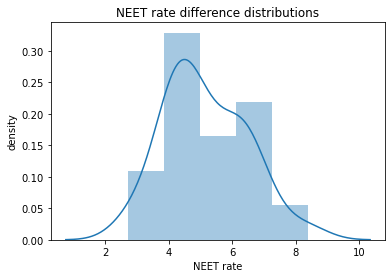

In [110]:
# Neet rate distribution
NEET_rate_dis = pd.Series(df['NEET_rate'])
ax = sns.distplot(NEET_rate_dis)
ax.set_title('NEET rate difference distributions')
ax.set_xlabel('NEET rate')
ax.set_ylabel('density')

In [111]:
df.corr()

,NEET_rate,Percentage_of economically_active_with_NVQ4,Job_density,Benefit_claimants_rate,A_grade_passes_rate,Number_of_state_funded_school
NEET_rate,1.000000,0.167256,0.255138,0.715938,-0.436254,0.150157
Percentage_of economically_active_with_NVQ4,0.167256,1.000000,0.392359,-0.008952,0.037510,-0.399889
Job_density,0.255138,0.392359,1.000000,0.025985,0.008210,-0.262042
Benefit_claimants_rate,0.715938,-0.008952,0.025985,1.000000,-0.537964,0.203458
A_grade_passes_rate,-0.436254,0.037510,0.008210,-0.537964,1.000000,-0.179347
Number_of_state_funded_school,0.150157,-0.399889,-0.262042,0.203458,-0.179347,1.000000


In [112]:
u = df['NEET_rate'].mean()  # 计算均值
std = df['NEET_rate'].std()  # 计算标准差
stats.kstest(df['NEET_rate'], 'norm', (u, std))

KstestResult(statistic=0.13612762507896625, pvalue=0.548098692681658)

<AxesSubplot:>

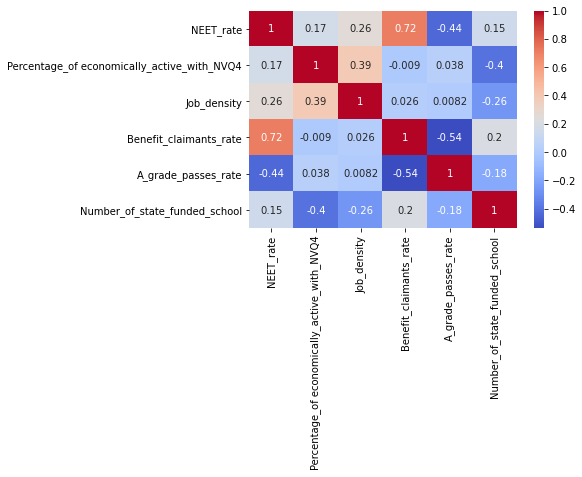

In [113]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [114]:
df['Percentage_of economically_active_with_NVQ4']

0     33.8
1     53.2
2     30.5
3     31.0
4     41.0
5     63.5
6     45.1
7     46.7
8     43.9
9     42.2
10    49.8
11    59.9
12    51.2
13    39.9
14    22.3
15    29.5
16    38.5
17    69.4
18    64.4
19    59.7
20    62.3
21    55.4
22    54.8
23    37.1
24    41.9
25    59.6
26    57.3
27    40.6
28    52.2
29    37.1
30    70.0
31    68.1
Name: Percentage_of economically_active_with_NVQ4, dtype: float64

In [115]:
df_final = {'Boroughs':df['Boroughs'], 
              'NEET_rate':df['NEET_rate'],
              'nvq4':df['Percentage_of economically_active_with_NVQ4'],
              'Job_density':df['Job_density'],
              'Benefit':df['Benefit_claimants_rate'],
              'A_grade':df['A_grade_passes_rate'],
              'school':df['Number_of_state_funded_school'],
              'children_in_poverty':df['Percentage_of_children_in_Poverty']
             } 
  
# Create DataFrame 
df_final = pd.DataFrame(df_final)

In [116]:
nvq4 = pd.Series(df['Percentage_of economically_active_with_NVQ4'])
Job_density = pd.Series(df['Job_density'])
Benefit = pd.Series(df['Benefit_claimants_rate'])
A_grade = pd.Series(df['A_grade_passes_rate'])
school = pd.Series(df['Number_of_state_funded_school'])
children_in_poverty = pd.Series(df['Percentage_of_children_in_Poverty'])

from statsmodels.formula.api import ols

#fit simple linear regression model
model1 = ols('NEET_rate ~ nvq4', data=df_final).fit()

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              NEET_rate   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8634
Date:                Sat, 16 Jan 2021   Prob (F-statistic):              0.360
Time:                        21:07:06   Log-Likelihood:                -52.879
No. Observations:                  32   AIC:                             109.8
Df Residuals:                      30   BIC:                             112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3304      0.915      4.733      0.0

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

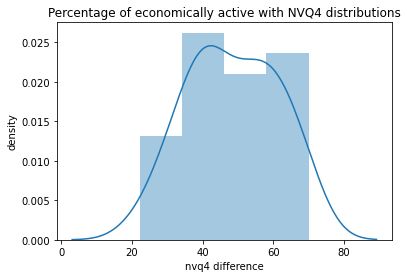

In [117]:
ax = sns.distplot(nvq4)
ax.set_title('Percentage of economically active with NVQ4 distributions')
ax.set_xlabel('nvq4 difference')
ax.set_ylabel('density')

In [100]:
ax = sns.distplot(NEET_rate)
ax.set_title('NEET rate 2010 distribution')
ax.set_xlabel('NEET rate difference')
ax.set_ylabel('density')

NameError: name 'NEET_rate' is not defined

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

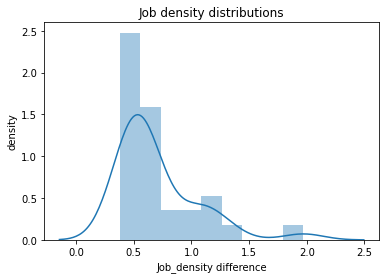

In [81]:
ax = sns.distplot(Job_density)
ax.set_title('Job density distributions')
ax.set_xlabel('Job_density difference')
ax.set_ylabel('density')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

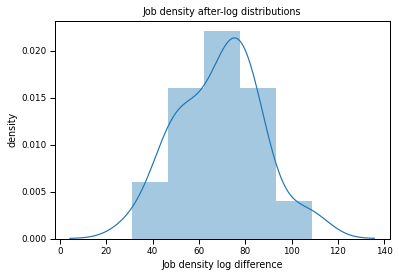

In [121]:
# log transformation for job density

job_density_log = np.log(Job_density)

ax = sns.distplot(job_density_log)
ax.set_title('Job density after-log distributions')
ax.set_xlabel('Job density log difference')
ax.set_ylabel('density')

In [99]:
# check the result of k-s test
u1 = job_density_log.mean()  # 计算均值
std1 = job_density_log.std()  # 计算标准差
stats.kstest(job_density_log, 'norm', (u1, std1))

KstestResult(statistic=0.20101549339869856, pvalue=0.1308471190171978)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

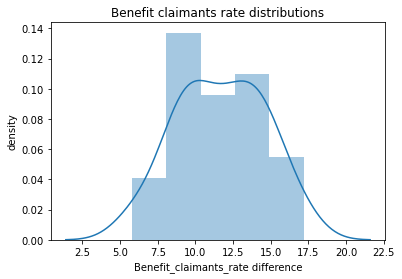

In [87]:
ax = sns.distplot(Benefit)
ax.set_title('Benefit claimants rate distributions')
ax.set_xlabel('Benefit_claimants_rate difference')
ax.set_ylabel('density')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

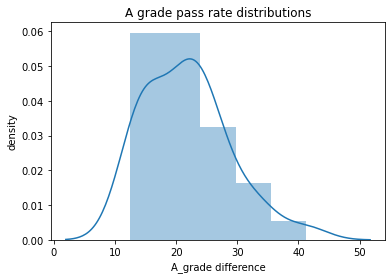

In [88]:
ax = sns.distplot(A_grade)
ax.set_title('A grade pass rate distributions')
ax.set_xlabel('A_grade difference')
ax.set_ylabel('density')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

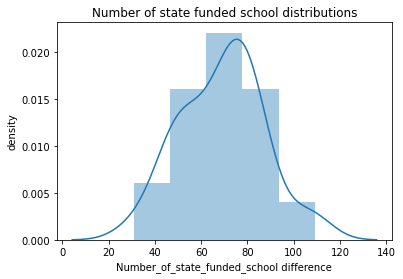

In [89]:
ax = sns.distplot(school)
ax.set_title('Number of state funded school distributions')
ax.set_xlabel('Number_of_state_funded_school difference')
ax.set_ylabel('density')

In [76]:
model2 = ols('NEET_rate ~ Job_density', data=df_final).fit()
#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              NEET_rate   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2.089
Date:                Sat, 16 Jan 2021   Prob (F-statistic):              0.159
Time:                        20:06:34   Log-Likelihood:                -52.256
No. Observations:                  32   AIC:                             108.5
Df Residuals:                      30   BIC:                             111.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.4876      0.513      8.747      

In [65]:
model3 = ols('NEET_rate ~ Benefit', data=df_final).fit()
#view model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              NEET_rate   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     31.55
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           4.09e-06
Time:                        15:31:27   Log-Likelihood:                -41.836
No. Observations:                  32   AIC:                             87.67
Df Residuals:                      30   BIC:                             90.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4465      0.680      2.128      0.0

In [66]:
model4 = ols('NEET_rate ~ A_grade', data=df_final).fit()
#view model summary
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:              NEET_rate   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7.052
Date:                Sat, 16 Jan 2021   Prob (F-statistic):             0.0126
Time:                        17:13:00   Log-Likelihood:                -49.955
No. Observations:                  32   AIC:                             103.9
Df Residuals:                      30   BIC:                             106.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9233      0.699      9.904      0.0

In [67]:
model5 = ols('NEET_rate ~ school', data=df_final).fit()
#view model summary
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              NEET_rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.6920
Date:                Sat, 16 Jan 2021   Prob (F-statistic):              0.412
Time:                        17:13:22   Log-Likelihood:                -52.968
No. Observations:                  32   AIC:                             109.9
Df Residuals:                      30   BIC:                             112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3966      0.938      4.685      0.0

In [69]:
model6 = ols('NEET_rate ~ children_in_poverty', data=df_final).fit()
#view model summary
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:              NEET_rate   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1.437
Date:                Sat, 16 Jan 2021   Prob (F-statistic):              0.493
Time:                        17:14:01   Log-Likelihood:                -3.9951
No. Observations:                  32   AIC:                             67.99
Df Residuals:                       2   BIC:                             112.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [78]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#df_final = {'Boroughs':df['Boroughs'], 
#              'NEET_rate':df['NEET_rate'],
#              'nvq4':df['Percentage_of economically_active_with_NVQ4'],
#              'Job_density':df['Job_density'],
#              'Benefit':df['Benefit_claimants_rate'],
#              'A_grade':df['A_grade_passes_rate'],
#              'school':df['Number_of_state_funded_school'],
#              'children_in_poverty':df['Percentage_of_children_in_Poverty']
 #            } 



# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model= smf.ols(formula='NEET_rate ~ nvq4 + Job_density + Benefit + A_grade + school + children_in_poverty ',data=df_final).fit()

# And this gives a big summary of the results:
print(multi_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:              NEET_rate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Jan 2021   Prob (F-statistic):                nan
Time:                        20:07:20   Log-Likelihood:                 971.64
No. Observations:                  32   AIC:                            -1879.
Df Residuals:                       0   BIC:                            -1832.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
